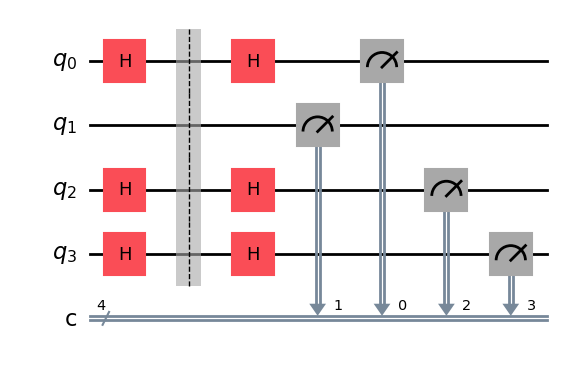

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile  
from qiskit.visualization import plot_histogram

# 初始化量子电路
num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)

# Bob准备认证粒子
qc.h(0)          
qc.h(2)
qc.h(3)          
qc.barrier()
# Bob操作
qc.h(0)        
qc.h(2)          
qc.h(3)          

#测量
qc.measure(range(num_qubits), range(num_qubits))




# 绘制结果
qc.draw('mpl')

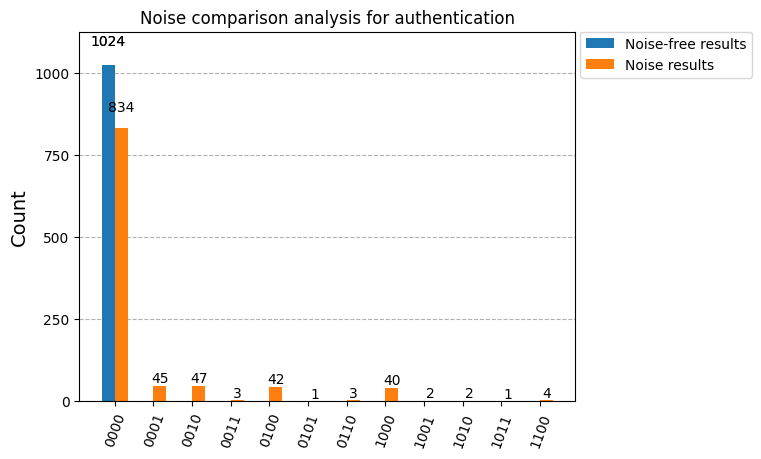

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
    depolarizing_error,
    ReadoutError
)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)

# Bob准备认证粒子
qc.h(0)          
qc.h(2)
qc.h(3)          
qc.barrier()
# Bob操作
qc.h(0)        
qc.h(2)          
qc.h(3)          

#测量
qc.measure(range(num_qubits), range(num_qubits))

# ================== 噪声模型 ==================
def custom_noise_model():
    noise_model = NoiseModel()
    T1, T2 = 100e3, 150e3
    gate_time, twoq_gate_time = 50, 150
    basis_gates = ['h', 'x', 'z', 'measure']
    
    for qubit in range(num_qubits):
        # 添加单量子位门噪声 (每个量子位单独添加)
        error_id = thermal_relaxation_error(T1, T2, gate_time)
        noise_model.add_quantum_error(error_id, "id", [qubit])
        
        error_x = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_x, "x", [qubit])
        
        error_z = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_z, "z", [qubit])
        
        H门噪声单独添加到每个量子位
        error_h = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_h, "h", [qubit])  
    
    # 读取错误保持原样
    meas_error = ReadoutError([[0.95, 0.05], [0.05, 0.95]])
    noise_model.add_all_qubit_readout_error(meas_error)
    return noise_model


backend_noise = AerSimulator(
    noise_model=custom_noise_model(),
    basis_gates=['h', 'x', 'z', 'measure']  # 包含所有需要的门
)

# ================== 无噪声模拟 ==================
backend_clean = AerSimulator()

# ================== 运行模拟 ==================
# 编译电路
qc_compiled = transpile(qc, backend_noise)

# 带噪声运行
job_noise = backend_noise.run(qc_compiled, shots=1024)
counts_noise = job_noise.result().get_counts()

# 无噪声运行
job_clean = backend_clean.run(qc_compiled, shots=1024)
counts_clean = job_clean.result().get_counts()

# ================== 显示结果 ==================
plot_histogram(
    [counts_clean, counts_noise],
    legend=['Noise-free results', 'Noise results'],
    title="Noise comparison analysis for authentication",
    bar_labels=True,  
    color=['#1f77b4', '#ff7f0e']  
)

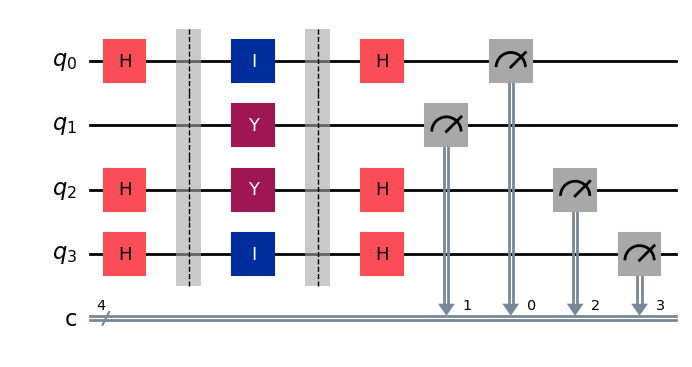

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile  
from qiskit.visualization import plot_histogram

# 初始化量子电路
num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)

# Alice准备认证粒子
qc.h(0)          
qc.h(2)
qc.h(3)          
qc.barrier()
# Alice操作
qc.id(0)
qc.y(1)        
qc.y(2) 
qc.id(3)         
qc.barrier()      
qc.h(0)
qc.h(2)
qc.h(3)
#测量
qc.measure(range(num_qubits), range(num_qubits))




# 绘制结果
qc.draw('mpl')

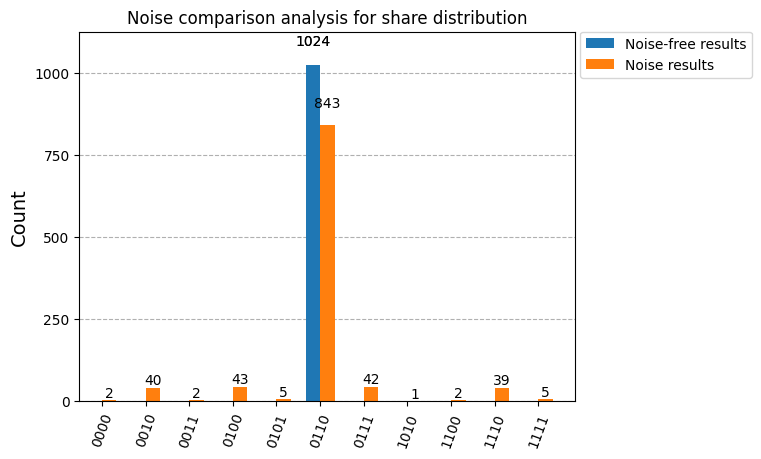

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
    depolarizing_error,
    ReadoutError
)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ================== 公共电路部分 ==================
num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)

# Alice准备认证粒子
qc.h(0)          
qc.h(2)
qc.h(3)          
qc.barrier()
# Alice操作
qc.id(0)
qc.y(1)        
qc.y(2) 
qc.id(3)         
qc.barrier()      
qc.h(0)
qc.h(2)
qc.h(3)
#测量
qc.measure(range(num_qubits), range(num_qubits))

# ================== 噪声模型 ==================
def custom_noise_model():
    noise_model = NoiseModel()
    T1, T2 = 100e3, 150e3
    gate_time, twoq_gate_time = 50, 150
    basis_gates = ['h', 'x', 'z', 'measure']
    
    for qubit in range(num_qubits):
        # 添加单量子位门噪声 (每个量子位单独添加)
        error_id = thermal_relaxation_error(T1, T2, gate_time)
        noise_model.add_quantum_error(error_id, "id", [qubit])
        
        error_x = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_x, "x", [qubit])
        
        error_z = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_z, "z", [qubit])
        
        # H门噪声单独添加到每个量子位
        error_h = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.001, 1)
        )
        noise_model.add_quantum_error(error_h, "h", [qubit])  
    
    # 读取错误保持原样
    meas_error = ReadoutError([[0.95, 0.05], [0.05, 0.95]])
    noise_model.add_all_qubit_readout_error(meas_error)
    return noise_model


backend_noise = AerSimulator(
    noise_model=custom_noise_model(),
    basis_gates=['h', 'x', 'z', 'measure']  # 包含所有需要的门
)



# ================== 无噪声模拟 ==================
backend_clean = AerSimulator()

# ================== 运行模拟 ==================
# 编译电路
qc_compiled = transpile(qc, backend_noise)

# 带噪声运行
job_noise = backend_noise.run(qc_compiled, shots=1024)
counts_noise = job_noise.result().get_counts()

# 无噪声运行
job_clean = backend_clean.run(qc_compiled, shots=1024)
counts_clean = job_clean.result().get_counts()

# ================== 显示结果 ==================
plot_histogram(
    [counts_clean, counts_noise],
    legend=['Noise-free results', 'Noise results'],
    title="Noise comparison analysis for share distribution",
    bar_labels=True,  
    color=['#1f77b4', '#ff7f0e']  
)

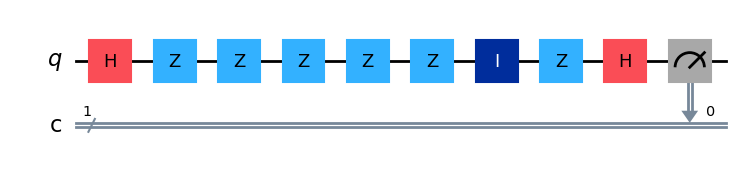

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile  
from qiskit.visualization import plot_histogram

# 初始化量子电路
num_qubits = 1
qc = QuantumCircuit(num_qubits, num_qubits)

# Alice准备认证粒子
qc.h(0)         
qc.z(0)          
qc.z(0)
# Bob1操作
qc.z(0)          
qc.z(0)
qc.z(0)
# Bob2操作
qc.id(0)          

# Bob3操作
qc.z(0)          

# 测量
qc.h(0)
qc.measure(0, 0)


simulator = Aer.get_backend('qasm_simulator')


qc_compiled = transpile(qc, simulator)  
job = simulator.run(qc_compiled, shots=1024)  
result = job.result()  


counts = result.get_counts(qc)

# 绘制结果
qc.draw('mpl')

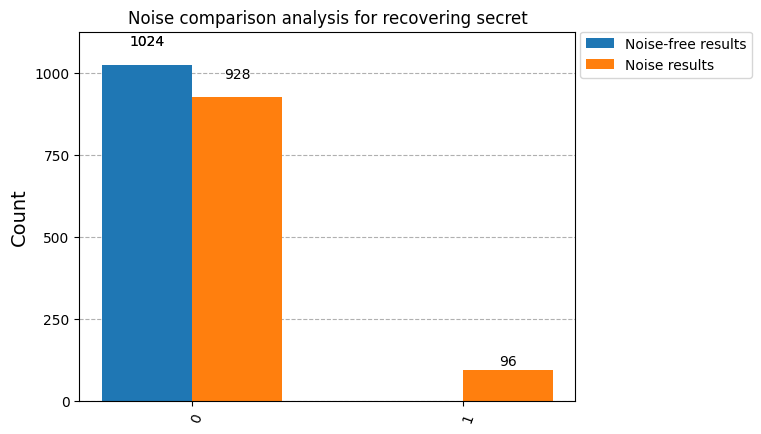

In [66]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
    depolarizing_error,
    ReadoutError
)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ================== 公共电路部分 ==================
num_qubits = 1
qc = QuantumCircuit(num_qubits, num_qubits)

# Alice准备认证粒子
qc.h(0)         
qc.z(0)          
qc.z(0)
# Bob1操作
qc.z(0)          
qc.z(0)
qc.z(0)
# Bob2操作
qc.id(0)          

# Bob3操作
qc.z(0)         

# 测量前返回计算基
qc.h(0)
qc.measure(0, 0)

# ================== 修正后的噪声模型 ==================
def custom_noise_model():
    noise_model = NoiseModel()
    T1, T2 = 100e3, 150e3
    gate_time, twoq_gate_time = 50, 150
    
    # 添加所有电路使用的量子门到基础门集
    basis_gates = ['h', 'x', 'z', 'measure']  
    
    for qubit in range(num_qubits):
        error_id = thermal_relaxation_error(T1, T2, gate_time)
        noise_model.add_quantum_error(error_id, "id", [qubit])
        
        error_x = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.002, 1)
        )
        noise_model.add_quantum_error(error_x, "x", [qubit])  # 添加X门噪声
        
        error_z = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.002, 1)
        )
        noise_model.add_quantum_error(error_z, "z", [qubit])  # 添加Z门噪声
    
    # 添加H门噪声
    error_h = thermal_relaxation_error(T1, T2, gate_time).compose(
        depolarizing_error(0.002, 1)
    )
    noise_model.add_quantum_error(error_h, "h", list(range(num_qubits)))
    
    meas_error = ReadoutError([[0.90, 0.10], [0.10, 0.90]])
    noise_model.add_all_qubit_readout_error(meas_error)
    return noise_model


backend_noise = AerSimulator(
    noise_model=custom_noise_model(),
    basis_gates=['h', 'x', 'z', 'measure']  # 包含所有需要的门
)

# ================== 无噪声模拟 ==================
backend_clean = AerSimulator()

# ================== 运行模拟 ==================
# 编译电路
qc_compiled = transpile(qc, backend_noise)

# 带噪声运行
job_noise = backend_noise.run(qc_compiled, shots=1024)
counts_noise = job_noise.result().get_counts()

# 无噪声运行
job_clean = backend_clean.run(qc_compiled, shots=1024)
counts_clean = job_clean.result().get_counts()

# ================== 显示结果 ==================
plot_histogram(
    [counts_clean, counts_noise],
    legend=['Noise-free results', 'Noise results'],
    title="Noise comparison analysis for recovering secret",
    bar_labels=True,  
    color=['#1f77b4', '#ff7f0e']  
)

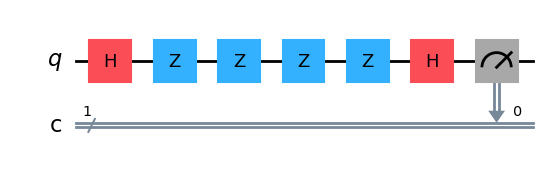

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile  
from qiskit.visualization import plot_histogram

# 初始化量子电路
qc = QuantumCircuit(1, 1)

# === Alice 准备阶段 ===
# Alice
qc.h(0)          
qc.z(0)
#B1

qc.z(0)
#B2          
qc.z(0)
qc.z(0)


# === 测量阶段 ===
qc.h(0)          # 返回计算基测量
qc.measure(0, 0)


simulator = Aer.get_backend('qasm_simulator')


qc_compiled = transpile(qc, simulator)  
job = simulator.run(qc_compiled, shots=1024)  
result = job.result()  


counts = result.get_counts(qc)

# 绘制结果
qc.draw('mpl')

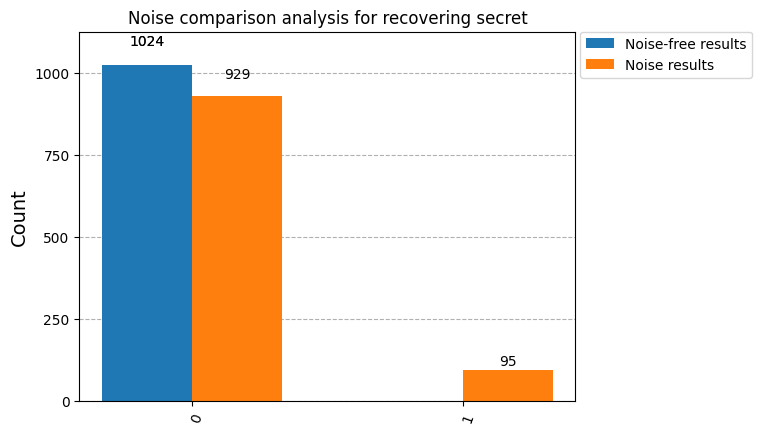

In [67]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
    depolarizing_error,
    ReadoutError
)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ================== 公共电路部分 ==================
qc = QuantumCircuit(1, 1)

# === Alice 准备阶段 ===

qc.h(0)          
qc.z(0)
#B1
qc.z(0)          
#B2          
qc.z(0)
qc.z(0)


# === 测量阶段 ===     
qc.h(0)    
qc.measure(0, 0)

# ================== 噪声模型 ==================
def custom_noise_model():
    noise_model = NoiseModel()
    T1, T2 = 100e3, 150e3
    gate_time, twoq_gate_time = 50, 150
    basis_gates = ['h', 'x', 'z', 'measure']
    
    for qubit in range(num_qubits):
        # 添加单量子位门噪声 (每个量子位单独添加)
        error_id = thermal_relaxation_error(T1, T2, gate_time)
        noise_model.add_quantum_error(error_id, "id", [qubit])
        
        error_x = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.002, 1)
        )
        noise_model.add_quantum_error(error_x, "x", [qubit])
        
        error_z = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.002, 1)
        )
        noise_model.add_quantum_error(error_z, "z", [qubit])
        
        
        error_h = thermal_relaxation_error(T1, T2, gate_time).compose(
            depolarizing_error(0.002, 1)
        )
        noise_model.add_quantum_error(error_h, "h", [qubit])  
    
    # 读取错误保持原样
    meas_error = ReadoutError([[0.90, 0.10], [0.90, 0.10]])
    noise_model.add_all_qubit_readout_error(meas_error)
    return noise_model


backend_noise = AerSimulator(
    noise_model=custom_noise_model(),
    basis_gates=['h', 'x', 'z', 'measure'] 
)

# ================== 无噪声模拟 ==================
backend_clean = AerSimulator()

# ================== 运行模拟 ==================
# 编译电路
qc_compiled = transpile(qc, backend_noise)

# 带噪声运行
job_noise = backend_noise.run(qc_compiled, shots=1024)
counts_noise = job_noise.result().get_counts()

# 无噪声运行
job_clean = backend_clean.run(qc_compiled, shots=1024)
counts_clean = job_clean.result().get_counts()

# ================== 显示结果 ==================
plot_histogram(
    [counts_clean, counts_noise],
    legend=['Noise-free results', 'Noise results'],
    title="Noise comparison analysis for recovering secret",
    bar_labels=True,  
    color=['#1f77b4', '#ff7f0e']  
)